This notebook contains the code used in the BigComp 2022 paper: <br>
<b>Heeryon Cho, Woo-Kyu Kang, Younsoo Park, Sungeu Chae, and Seong-joon Kim, "Multi-label Facial Emotion Recognition Using Korean Drama Movie Clips," BigComp 2022.</b>
### This code builds an autoencoder model from color, cropped face images. 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
import random as rn

In [3]:
# Record cell run time.
#!pip install ipython-autotime

%load_ext autotime

time: 497 µs (started: 2021-12-03 04:26:49 +00:00)


In [4]:
# Set seed for reproducibility.

set_seed = 42
np.random.seed(set_seed)
rn.seed(set_seed)
tf.random.set_seed(set_seed)

time: 1.81 ms (started: 2021-12-03 04:26:49 +00:00)


In [5]:
# Some reference codes for building autoencoders for color images.
# https://blog.keras.io/building-autoencoders-in-keras.html
# https://keras.io/examples/vision/autoencoder/

def create_autoencoder():
    # Define the model
    model = Sequential()

    #1st convolution layer
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(64,64,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

    #2nd convolution layer
    model.add(Conv2D(32,(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

    #3rd convolution layer
    model.add(Conv2D(32,(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))    

    #1st deconvolution layer
    model.add(Conv2DTranspose(32,(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(UpSampling2D((2, 2)))
    
    #2nd deconvolution layer
    model.add(Conv2DTranspose(32,(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(UpSampling2D((2, 2)))

    #3rd deconvolution layer
    model.add(Conv2DTranspose(32,(3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(UpSampling2D((2, 2)))    

    model.add(Conv2D(3,(3, 3), padding='same'))
    model.add(Activation('sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy')
    model.summary()
    
    return model

time: 4.93 ms (started: 2021-12-03 04:26:49 +00:00)


In [6]:
# Generate data from the images in a folder.
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

batch_size = 64
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last', validation_split=0.1)
train_generator = train_datagen.flow_from_directory(
    './image',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='input',
    classes=[''],
    subset='training'
    )
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last', validation_split=0.1)
validation_generator = test_datagen.flow_from_directory(
    './image',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='input',
    classes=[''],
    subset='validation'
    )

Found 34936 images belonging to 1 classes.
Found 3881 images belonging to 1 classes.
time: 1.02 s (started: 2021-12-03 04:26:49 +00:00)


In [7]:
# Train the autoencoder.

checkpoint_path = "./model/autoencoder.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)    
autoencoder = create_autoencoder()

history = autoencoder.fit_generator(
        train_generator,
        steps_per_epoch=34936 // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=3881 // batch_size,
        callbacks=[cp_callback])    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

545/545 [==============================] - 20s 37ms/step - loss: 0.5318 - val_loss: 0.5611

Epoch 00034: saving model to ./model/autoencoder.ckpt
Epoch 35/100
545/545 [==============================] - 20s 36ms/step - loss: 0.5317 - val_loss: 0.5611

Epoch 00035: saving model to ./model/autoencoder.ckpt
Epoch 36/100
545/545 [==============================] - 20s 37ms/step - loss: 0.5317 - val_loss: 0.5612

Epoch 00036: saving model to ./model/autoencoder.ckpt
Epoch 37/100
545/545 [==============================] - 20s 37ms/step - loss: 0.5317 - val_loss: 0.5612

Epoch 00037: saving model to ./model/autoencoder.ckpt
Epoch 38/100
545/545 [==============================] - 20s 36ms/step - loss: 0.5317 - val_loss: 0.5610

Epoch 00038: saving model to ./model/autoencoder.ckpt
Epoch 39/100
545/545 [==============================] - 21s 38ms/step - loss: 0.5316 - val_loss: 0.5611

Epoch 00039: saving model to ./model/autoencoder.ckpt
Epoch 40/100
545/545 [==============================] - 21s


Epoch 00085: saving model to ./model/autoencoder.ckpt
Epoch 86/100
545/545 [==============================] - 21s 38ms/step - loss: 0.5311 - val_loss: 0.5605

Epoch 00086: saving model to ./model/autoencoder.ckpt
Epoch 87/100
545/545 [==============================] - 20s 37ms/step - loss: 0.5311 - val_loss: 0.5606

Epoch 00087: saving model to ./model/autoencoder.ckpt
Epoch 88/100
545/545 [==============================] - 21s 38ms/step - loss: 0.5311 - val_loss: 0.5608

Epoch 00088: saving model to ./model/autoencoder.ckpt
Epoch 89/100
545/545 [==============================] - 20s 37ms/step - loss: 0.5311 - val_loss: 0.5606

Epoch 00089: saving model to ./model/autoencoder.ckpt
Epoch 90/100
545/545 [==============================] - 20s 37ms/step - loss: 0.5311 - val_loss: 0.5608

Epoch 00090: saving model to ./model/autoencoder.ckpt
Epoch 91/100
545/545 [==============================] - 21s 39ms/step - loss: 0.5311 - val_loss: 0.5609

Epoch 00091: saving model to ./model/autoenco

dict_keys(['loss', 'val_loss'])


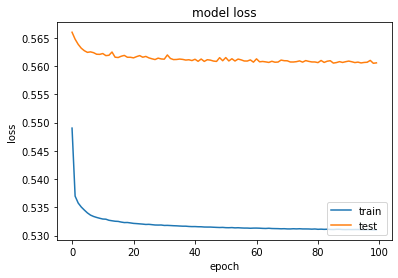

time: 155 ms (started: 2021-12-03 05:10:40 +00:00)


In [18]:
# Summarize history for loss.

print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [19]:
# Check that autoencoder files are created in the 'model' folder.

!ls -la ./model

total 592
drwxr-xr-x 3 root root   4096 Dec  3 05:01 .
drwxr-xr-x 7 root root   4096 Dec  3 05:01 ..
drwxr-xr-x 2 root root   4096 Dec  3 04:26 .ipynb_checkpoints
-rw-r--r-- 1 root root 582429 Dec  3 05:01 autoencoder.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root   3346 Dec  3 05:01 autoencoder.ckpt.index
-rw-r--r-- 1 root root     89 Dec  3 05:01 checkpoint
time: 359 ms (started: 2021-12-03 05:11:09 +00:00)


In [20]:
# Test the model

sample = validation_generator.next()

# Generate noisy image
noisy_img = np.zeros(sample[0][0].shape, np.float32)

mean = 0
sigma = 0.05

gaussian = np.random.normal(mean, sigma, (sample[0][0].shape[0], sample[0][0].shape[1]))
gaussian = gaussian[..., np.newaxis]
#gaussian.shape

noisy_sample = []
for img in sample[0]:
    noisy_img = img + gaussian
    noisy_sample.append(noisy_img)

noisy_sample = np.array(noisy_sample)
noisy_sample.shape

denoised = autoencoder.predict(noisy_sample)
#denoised.shape
#denoised[0].shape

time: 179 ms (started: 2021-12-03 05:11:13 +00:00)


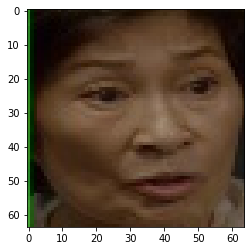

time: 136 ms (started: 2021-12-03 05:11:14 +00:00)


In [21]:
# original image
plt.imshow(sample[0][0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


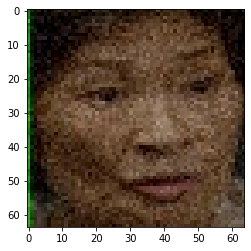

time: 134 ms (started: 2021-12-03 05:11:16 +00:00)


In [22]:
# noisy image
noisy_img = sample[0][0] + gaussian
plt.imshow(noisy_img)

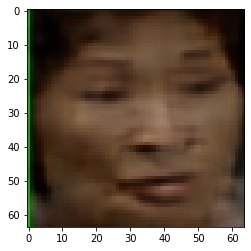

time: 134 ms (started: 2021-12-03 05:11:17 +00:00)


In [23]:
# denoised image
plt.imshow(denoised[0])

### Load the autoencoder weights.

In [24]:
# Use the crate_autoencder() function to build the model frame.

autoencoder = create_autoencoder()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)       

In [25]:
# Specify the path to autoencoder model weights and load the weights.
checkpoint_path = "./model/autoencoder.ckpt"
autoencoder.load_weights(checkpoint_path)

time: 59.4 ms (started: 2021-12-03 05:11:26 +00:00)
